# Data Prep

This notebook:
1. Generates data for instructional slides
2. Walks through a simple linear regression ML Model predicting housing prices

In [1]:
import os

import matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = 999

NOTEBOOK_PATH = os.path.dirname(os.path.realpath("__file__"))
OUTPUT_PATH = os.path.join(NOTEBOOK_PATH, '..', 'output')

# Generating Data for Linear Regression Example

In [2]:
# Set a random number generator to ensure reproducible results
rng = np.random.seed(2021)

In [3]:
# Randomly generate some data
sq_ft = np.random.normal(loc=2000, scale=300, size=100)
price = 200*sq_ft + np.random.normal(loc=70000, scale=50000, size=100)

df = pd.DataFrame({'price': price, 'sq_ft': sq_ft})

In [4]:
df.head()

,price,sq_ft
0,522287.826996,2446.582716
1,533472.311350,2202.803261
2,507755.262917,1874.464589
3,399523.547508,1758.043756
4,530419.304998,2166.762749


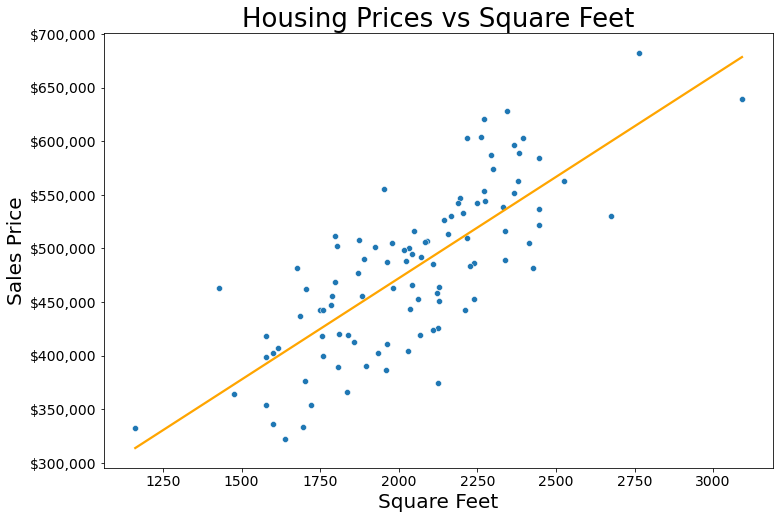

In [19]:
# Graphing Results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# Draw Scatter Plot
sns.scatterplot(data=df, x='sq_ft', y='price', ax=ax)

# Draw line of best fit (which is essentially the output of Linear Regression)
sns.regplot(data=df, x='sq_ft', y='price', ci=None, ax=ax, color='orange', scatter=False)

# Adjust labels
ax.set_xlabel('Square Feet', fontsize=20)
ax.set_ylabel('Sales Price', fontsize=20)
ax.set_title('Housing Prices vs Square Feet', fontsize=26)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(np.min(sq_ft) - 100, np.max(sq_ft) + 100)

# Set Y axis to Dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.savefig(os.path.join(OUTPUT_PATH, "sample_housing_prices_vs_sqft.png"))
plt.show()



# Generating Another Example for Group Exercise

In [20]:
# Randomly generate some data
sq_ft = np.random.normal(loc=2000, scale=300, size=100)
price = 400*sq_ft + np.random.normal(loc=70000, scale=50000, size=100)

df = pd.DataFrame({'price': price, 'sq_ft': sq_ft})

0      668.370364
1      543.972848
2      756.421966
3     1279.126911
4        9.668704
         ...     
95    1138.702134
96     836.841608
97    1168.692054
98    1017.545467
99     986.444873
Name: sq_ft, Length: 100, dtype: float64

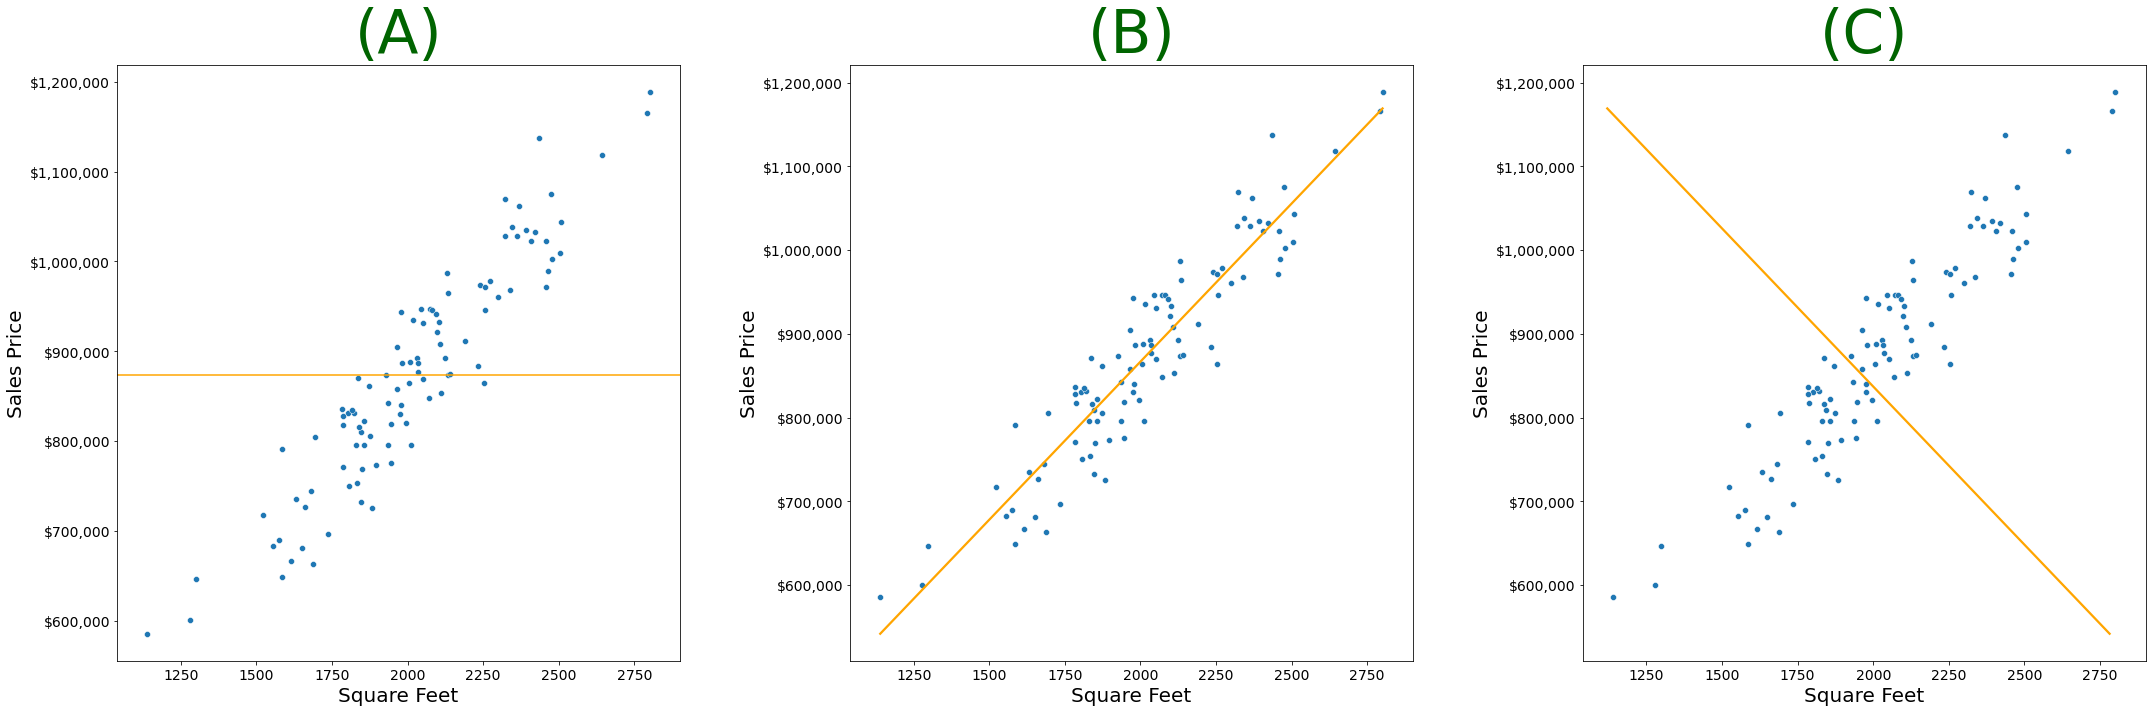

In [62]:
# Graphing Results
label_dict = {
    0: '(A)',
    1: '(B)',
    2: '(C)',
}

fig, ax_lst = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Draw Scatter Plot
for idx, ax in enumerate(ax_lst):
    sns.scatterplot(data=df, x='sq_ft', y='price', ax=ax)
    
    if idx == 0:
        ax.axhline(np.mean(df.price), color='orange')
    if idx == 1:
        sns.regplot(data=df, x='sq_ft', y='price', ci=None, ax=ax, color='orange', scatter=False)
    if idx == 2:
        sns.regplot(x=df.sq_ft * -1 + 1.4*np.max(df.sq_ft), y=df.price, ci=None, ax=ax, color='orange', scatter=False)
    
    # Adjust Labels
    ax.set_ylabel('Sales Price', fontsize=20)
    ax.set_xlabel('Square Feet', fontsize=20)
    ax.set_title(label_dict[idx], fontsize=60, color='darkgreen')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlim(np.min(sq_ft) - 100, np.max(sq_ft) + 100)

    # Set Y axis to Dollars
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 

plt.tight_layout(w_pad=6)
plt.savefig(os.path.join(OUTPUT_PATH, "sample_housing_prices_vs_sqft_group_exercise.png"))
plt.show()